In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

the number of errors in training(C), and the sum of the value of error(𝚺𝛇)

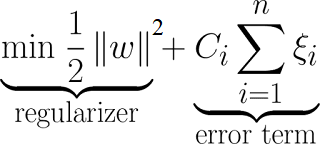

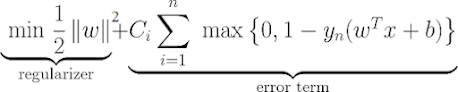

In [4]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
    
    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses 
    
    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [5]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [8]:
svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

In [9]:
w

array([[0.44477983, 0.15109913]])

In [10]:
b

0.05700000000000004

In [11]:
losses

[1.0,
 0.07021230572002322,
 0.04337669810121732,
 0.048996155149764964,
 0.055660308995054905,
 0.05991419317398984,
 0.0639300645342227,
 0.06511998402453194,
 0.06774286653318795,
 0.06885396110405564,
 0.07154640211008972,
 0.07268425165224654,
 0.07382992662872023,
 0.07498340129647202,
 0.07614464997402351,
 0.07731364704132343,
 0.07849036693961484,
 0.07967478417130242,
 0.08086687329982029,
 0.0837698706169017,
 0.08498792231844662,
 0.08621353449331884,
 0.08744668203277349,
 0.08887537349247536,
 0.09012464505107068,
 0.09138137324874177,
 0.09283771488249136,
 0.09411040192233192,
 0.09539046745749956,
 0.0968742040933603,
 0.09648443169864133,
 0.09797551376518052,
 0.09947652110832368,
 0.09907892862779541,
 0.10058721765583321,
 0.10018629791733229,
 0.10170184176003029,
 0.10149853977835199,
 0.10129564419733506,
 0.10109315420458459,
 0.10089106898932963,
 0.10068938774241996,
 0.10048810965632285,
 0.10028723392511986,
 0.10008675974450355,
 0.0998866863117743,
 0.099